In [1]:
#!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#input_folder = 'data/config_builder/'
current_folder = 'drive/My Drive/DAI-Labor/RL_VPP_Thesis/'
input_folder = current_folder + 'data/scenario_datasets/'
elvis_output_folder = current_folder + 'data/elvis_output_data_0/'
output_folder = current_folder + 'data/environment_table_0/'

Mounted at /content/drive


In [4]:
Avail_energy_table = pd.read_csv(elvis_output_folder + 'Avail_energy_simulation_year_15.csv')
EV_load = pd.read_csv(elvis_output_folder + 'EV_load_simulate_year.csv')

PV_load = pd.read_csv(input_folder + 'PV_load_test_year_15.csv')
WT_load = pd.read_csv(input_folder + 'WT_load_test_year_15.csv')
household_load = pd.read_csv(input_folder + 'household_load_test_year_15.csv')
market_prices = pd.read_csv(input_folder + 'market_prices_load_test_year_15.csv')

In [5]:
#Time indexes check
time_serie = Avail_energy_table["time"].values

assert(all(time_serie == EV_load["time"].values))
assert(all(time_serie == PV_load["time"].values))
assert(all(time_serie == WT_load["time"].values))
assert(all(time_serie == household_load["time"].values))
assert(all(time_serie == market_prices["time"].values))

print(len(time_serie))
print(time_serie)

35041
['2017-01-01 00:00:00' '2017-01-01 00:15:00' '2017-01-01 00:30:00' ...
 '2017-12-31 23:30:00' '2017-12-31 23:45:00' '2018-01-01 00:00:00']


In [6]:
#initialization of VPP table
VPP_table = pd.DataFrame({"time": time_serie})
VPP_table["time"] = pd.to_datetime(VPP_table["time"])

VPP_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    35041 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 273.9 KB


In [7]:
#Data preparation
household_load.rename(columns = {'power':'household_power'}, inplace = True) #kW
#household_load = household_load.set_index("time")
household_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             35041 non-null  object 
 1   household_power  35041 non-null  float64
dtypes: float64(1), object(1)
memory usage: 547.6+ KB


In [8]:
EV_load.rename(columns = {'power':'ev_power'}, inplace = True) #kW
#EV_load = EV_load.set_index("time")
EV_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      35041 non-null  object 
 1   ev_power  35041 non-null  float64
dtypes: float64(1), object(1)
memory usage: 547.6+ KB


In [9]:
RW_load = pd.DataFrame({"time": time_serie})
RW_load["time"] = pd.to_datetime(RW_load["time"])

RW_load["renewable_power"] = PV_load["electricity"] + WT_load["electricity"] #kW
#RW_load = RW_load.set_index("time")
RW_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             35041 non-null  datetime64[ns]
 1   renewable_power  35041 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 547.6 KB


In [10]:
#Merging of tables
VPP_table = pd.concat((VPP_table, EV_load["ev_power"], household_load["household_power"], RW_load["renewable_power"], market_prices["EUR/kWh"] ), axis = 1)
#VPP_table = VPP_table.set_index("time")
VPP_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             35041 non-null  datetime64[ns]
 1   ev_power         35041 non-null  float64       
 2   household_power  35041 non-null  float64       
 3   renewable_power  35041 non-null  float64       
 4   EUR/kWh          35041 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.3 MB


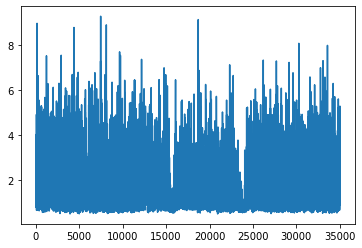

In [11]:
VPP_table["household_power"].plot()

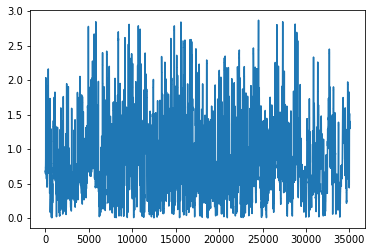

In [12]:
VPP_table["renewable_power"].plot()

In [13]:


VPP_table["House&RW_load"] = VPP_table["household_power"] - VPP_table["renewable_power"] #kW
VPP_table["total_load"] = VPP_table["House&RW_load"] + VPP_table["ev_power"] #kW
VPP_table["total_cost"] = VPP_table["total_load"] * VPP_table["EUR/kWh"] / 4

VPP_table.info()
#Avail_energy_table.iloc[:,3:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             35041 non-null  datetime64[ns]
 1   ev_power         35041 non-null  float64       
 2   household_power  35041 non-null  float64       
 3   renewable_power  35041 non-null  float64       
 4   EUR/kWh          35041 non-null  float64       
 5   House&RW_load    35041 non-null  float64       
 6   total_load       35041 non-null  float64       
 7   total_cost       35041 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.1 MB


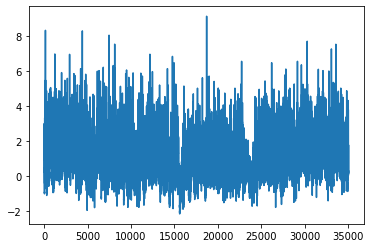

In [14]:
VPP_table["House&RW_load"].plot()

Total energy consumed: kWh 6649.169772050001


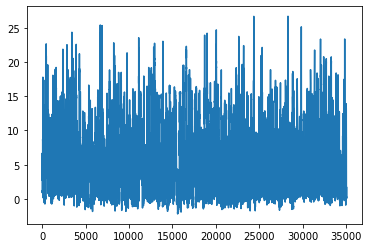

In [15]:
print("Total energy consumed: kWh", np.sum(VPP_table["House&RW_load"].values)/4)
VPP_table["total_load"].plot()

Total cost: € 1791.1421205102567


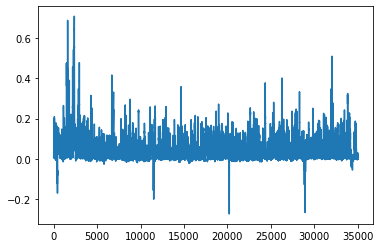

In [16]:
print("Total cost: €", np.sum(VPP_table["total_cost"].values))
VPP_table["total_cost"].plot()


In [17]:
VPP_table = pd.concat((VPP_table, Avail_energy_table.iloc[:,2:] ), axis = 1)

VPP_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      35041 non-null  datetime64[ns]
 1   ev_power                  35041 non-null  float64       
 2   household_power           35041 non-null  float64       
 3   renewable_power           35041 non-null  float64       
 4   EUR/kWh                   35041 non-null  float64       
 5   House&RW_load             35041 non-null  float64       
 6   total_load                35041 non-null  float64       
 7   total_cost                35041 non-null  float64       
 8   Available_energy_sources  35041 non-null  object        
 9   EVs_id                    35041 non-null  object        
 10  Charging_stations_pw      35041 non-null  object        
 11  EVs                       35041 non-null  object        
dtypes: datetime64[ns](

In [18]:
VPP_table_csv = VPP_table.to_csv(output_folder + 'VPP_table_complete_year_15.csv', index = True)